## Importing Libraries and Dataset

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [139]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [140]:
dataset = pd.read_csv('SMSSpamCollection',sep='\t',names = ['label','message'])

In [141]:
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Encoding label Column

In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['label'] = le.fit_transform(dataset['label'])

## Visualizing

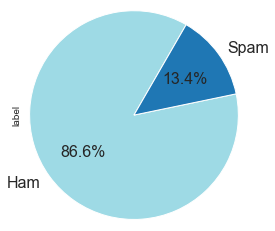

In [143]:
dataset['label'].value_counts().plot.pie(labels = ['Ham','Spam'],autopct = "%.1f%%", startangle = 60,
                                     radius = 1.2,textprops={'fontsize': 16},cmap = 'tab20_r')
plt.show()

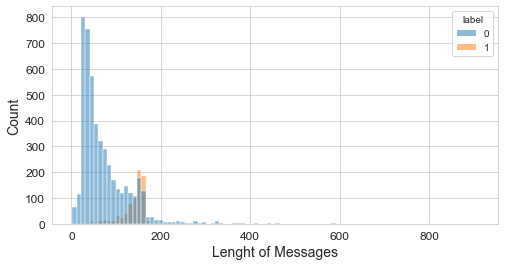

In [161]:
dataset['Len'] = dataset['message'].apply(len) # Adding 'Len' column to show the length of reviews

plt.figure(figsize = (8,4))
sns.histplot(x = 'Len',data = dataset,hue = 'label')
plt.xlabel('Lenght of Messages',size = 14)
plt.ylabel('Count',size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

dataset.drop('Len',axis = 1,inplace = True) # Removing the 'Len' column

## Download Stopwords

In [145]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Create Stopwords and PorterStemmer

In [146]:
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

## Cleaning the Labels

In [147]:
corpus = []

for i in range(0,len(dataset)):
    message = re.sub('[^a-zA-Z]',' ',dataset['message'][i])
    message = message.lower()
    message = message.split()
    message = [ps.stem(word) for word in message if not word in set(all_stopwords)]
    message = ' '.join(message)
    corpus.append(message)

## Creating the Bag of Words Model

In [148]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,0].values

## Split the Data into the Train set and Test set

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

## Creating Machine Learning Models

In [150]:
def calculate_scores(y_pred,algorithmName):
    global df_result,index
    
    from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
    
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    acc = accuracy_score(y_test,y_pred).round(3)
    precision = precision_score(y_test,y_pred).round(3)
    recall = recall_score(y_test,y_pred).round(3)
    
    d = {'classifier':[algorithmName],'accuracy':[acc],'precision':[precision],'recall':[recall],'true positive':[tp],
         'true negative':[tn],'false positive':[fp],'false negative':[fn]}
    new_df = pd.DataFrame(data = d,index = [index])
    df_result = pd.concat([df_result,new_df])
    index += 1

### Random Forest

In [151]:
def random_forest():
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(criterion='entropy',n_estimators = 100).fit(x_train,y_train)
    y_pred = rfc.predict(x_test)
    calculate_scores(y_pred,'Random Forest')

### Decision Tree

In [152]:
def decision_tree():
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)
    y_pred = dtc.predict(x_test)
    calculate_scores(y_pred,'Decision Tree')

### K Nearest Neighbors

In [153]:
def knn():
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=13).fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    calculate_scores(y_pred,'KNN')

### Naive Bayes

In [154]:
def naive_bayes():
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB().fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    calculate_scores(y_pred,'Naive Bayes')

### Multilayer Perceptron

In [155]:
def mlp():
    from sklearn.neural_network import MLPClassifier
    mlp = MLPClassifier(early_stopping=True,batch_size=64).fit(x_train,y_train)
    y_pred = mlp.predict(x_test)
    calculate_scores(y_pred,'MLP')

### Logistic Regression

In [156]:
def logistic_reg():
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression().fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    calculate_scores(y_pred,'Logistic Regression')

## Result

In [157]:
df_result = pd.DataFrame()
index = 1
functions = [random_forest,decision_tree,knn,naive_bayes,mlp,logistic_reg]
for function in functions:
    print(f'{index}/{len(functions)}')
    function()
     
df_result.sort_values(by = 'accuracy',ascending=False)

1/6
2/6
3/6
4/6
5/6
6/6


,classifier,accuracy,precision,recall,true positive,true negative,false positive,false negative
5,MLP,0.985,0.995,0.891,197,1450,1,24
6,Logistic Regression,0.982,0.985,0.878,194,1448,3,27
1,Random Forest,0.978,0.995,0.837,185,1450,1,36
2,Decision Tree,0.974,0.928,0.869,192,1436,15,29
3,KNN,0.890,1.000,0.167,37,1451,0,184
4,Naive Bayes,0.864,0.493,0.900,199,1246,205,22
